In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_BK = pd.read_csv("/content/drive/MyDrive/NYC Building Data/BK.csv")

In [3]:
data_BK.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea',
       'SanitBoro', 'SanitDistrict', 'SanitSub', 'Address', 'ZoneDist1',
       'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2',
       'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource', 'NumBldgs',
       'NumFloors', 'UnitsRes', 'UnitsTotal', 'LotFront', 'LotDepth',
       'BldgFront', 'BldgDepth', 'Ext', 'ProxCode', 'IrrLotCode', 'LotType',
       'BsmtCode', 'AssessLand', 'AssessTot', 'ExemptLand', 'ExemptTot',
       'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL',
       'CondoNo', 'Tract2010', 'XCoord', 'YCoo

In [4]:
data_BK = data_BK[['ZipCode','Address','BldgClass','LandUse',
                   'OwnerType','OwnerName','LotArea','BldgArea',
                   'ComArea','ResArea','OfficeArea', 'RetailArea', 'GarageArea', 
                   'StrgeArea','FactryArea', 'OtherArea','NumFloors', 'UnitsRes','UnitsTotal','YearBuilt',
                   'YearAlter1', 'YearAlter2','BuiltFAR','CommFAR','XCoord', 'YCoord']]
data_BK.head(5)

,ZipCode,Address,BldgClass,LandUse,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,CommFAR,XCoord,YCoord
0,11201.0,JOHN STREET,V1,11.0,P,BROOKLYN BRIDGE PARK,151930,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.00,2.0,NaN,NaN
1,11201.0,10 JAY STREET,E9,6.0,NaN,SAFDI PLAZA REALTY IN,19682,154400,154400,0,17160,0,0,68620,0,68620,9.0,0,90,1920,1994,2007,7.84,2.0,987838.0,195989.0
2,11201.0,1 JOHN STREET,RM,4.0,NaN,NaN,0,102534,4686,97848,0,4686,0,0,0,0,12.0,42,44,0,0,0,0.00,2.0,987624.0,195992.0
3,11201.0,JAY STREET,U4,7.0,NaN,CONSOLIDED EDISON CO/,387060,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.00,2.0,988568.0,196151.0
4,11201.0,JAY STREET,T2,7.0,C,NYC DSBS,6384,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.00,2.0,NaN,NaN


In [5]:
# Check percentage of null data
(data_BK.isnull().sum()/len(data_BK)*100)

ZipCode        0.254031
Address        0.069642
BldgClass      0.066395
LandUse        0.502290
OwnerType     85.036319
OwnerName      1.350986
LotArea        0.000000
BldgArea       0.000000
ComArea        0.000000
ResArea        0.000000
OfficeArea     0.000000
RetailArea     0.000000
GarageArea     0.000000
StrgeArea      0.000000
FactryArea     0.000000
OtherArea      0.000000
NumFloors      0.000000
UnitsRes       0.000000
UnitsTotal     0.000000
YearBuilt      0.000000
YearAlter1     0.000000
YearAlter2     0.000000
BuiltFAR       0.000000
CommFAR        0.000000
XCoord         1.133399
YCoord         1.133399
dtype: float64

In [6]:
data_BK["OwnerType"].unique()

array(['P', nan, 'C', 'X', 'O', 'M'], dtype=object)

    - C City Ownership
    - M Mixed City & Private Ownership
    - O Other – Public Authority, State or Federal Ownership
    - P Private Ownership – Either the tax lot has started an “in rem action or it was once city owned.
    - X Mixed (Excludes property with a C, M, O, or P ownership code). 
    Fully tax exempt property that could be owned by the city, state, or federal government; a public authority; or a private institution
    - blank Unknown (Usually Private Ownership)

In [7]:
# Rename NULL in OwnerType as UNK indicates an unknown ownership, we don't drop NULL here because it is not a mistake
data_BK["OwnerType"] = data_BK["OwnerType"].fillna("UNK").astype('category')
data_BK["OwnerType"] = data_BK["OwnerType"].cat.reorder_categories(['P', 'C', 'X', 'O', 'M', 'UNK'])

In [8]:
# Because the other NULL value is only ~1%, we decide to drop it for now
data_BK.dropna(inplace=True)

In [9]:
# Drop value(s) with coordinates 0
data_BK = data_BK[data_BK['XCoord'] != 0]

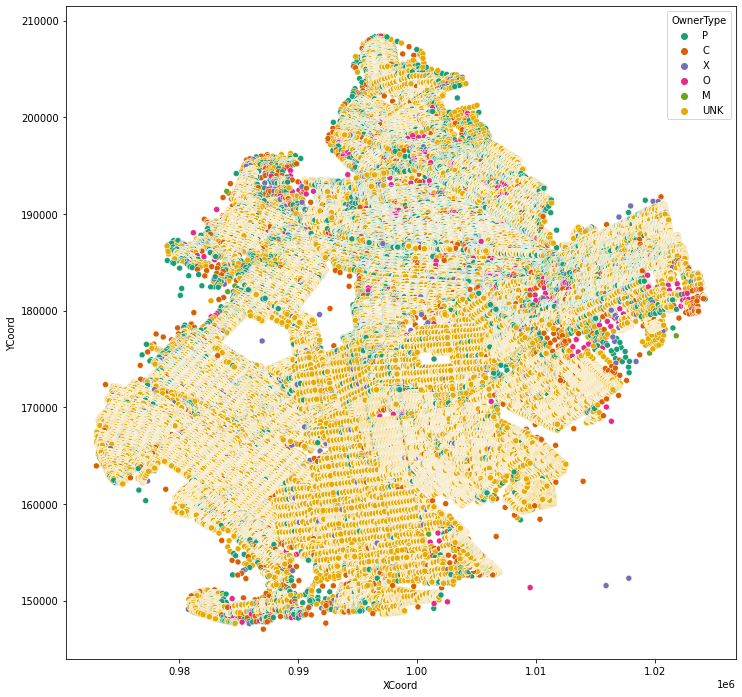

In [10]:
# Distribution of property by OwnerType
plt.figure(figsize=(12,12))
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_BK, hue='OwnerType', palette='Dark2');

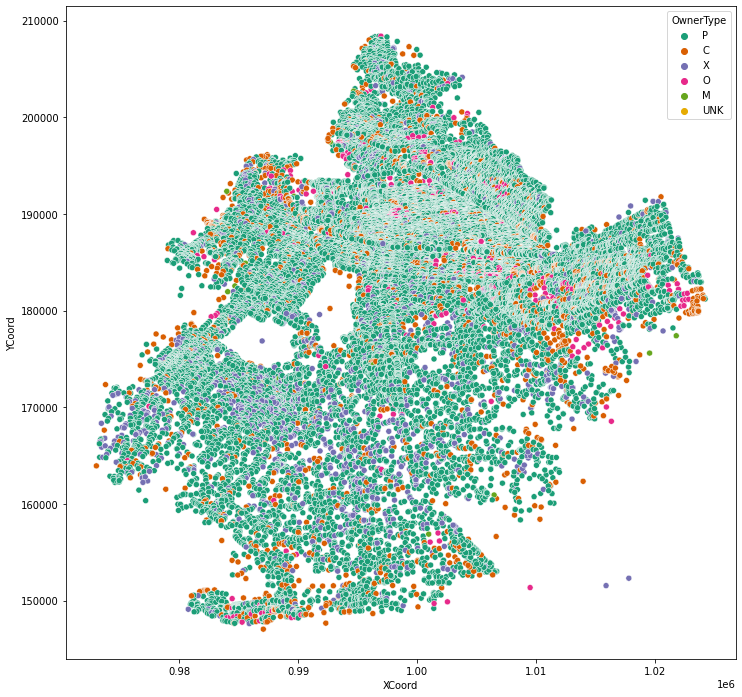

In [11]:
# Distribution of property by OwnerType (UNK excluded)
plt.figure(figsize=(12,12))
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_BK[data_BK['OwnerType'] != 'UNK'], hue='OwnerType', palette='Dark2');

    - 01 One &Two Family Buildings
    - 02 Multi-Family Walk-Up Buildings
    - 03 Multi-Family Elevator Buildings
    - 04 Mixed Residential & Commercial Buildings
    - 05 Commercial & Office Buildings
    - 06 Industrial & Manufacturing
    - 07 Transportation & Utility
    - 08 Public Facilities & Institutions
    - 09 Open Space & Outdoor Recreation
    - 10 Parking Facilities
    - 11 Vacant Land

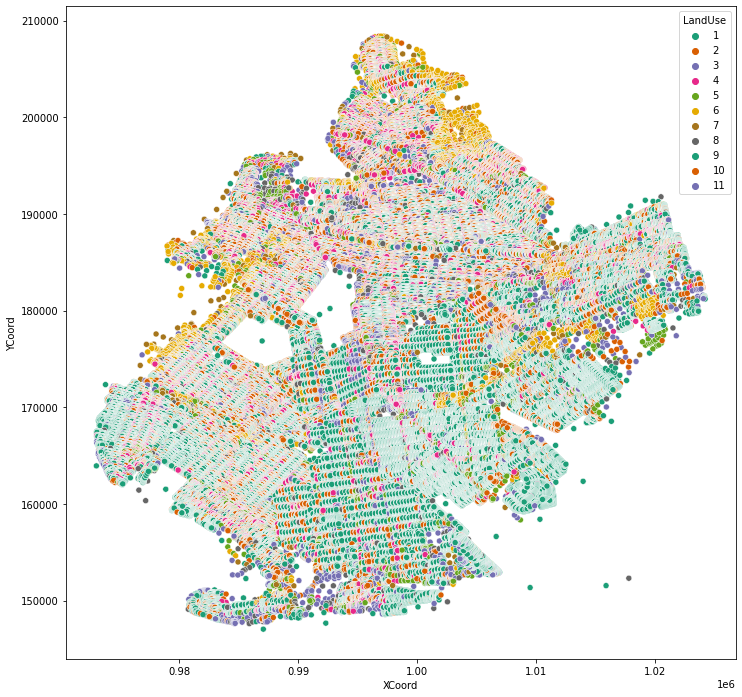

In [12]:
# Distribution of property by LandUse
plt.figure(figsize=(12,12))
data_BK['LandUse'] = data_BK['LandUse'].astype('int').astype('category')
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_BK, hue='LandUse', palette='Dark2');

**Investigate YearBuilt**

In [13]:
# Check how many building with unknown YearBuilt
sum(data_BK['YearBuilt'] == 0)/len(data_BK['YearBuilt'])*100

3.1479440975584416

In [14]:
# Because it is only about 3%, I think we can remove that observation for now
data_BK_nonZero = data_BK[data_BK['YearBuilt'] != 0]
# Create Age variable by substracting current year with YearBuilt
data_BK_nonZero['Age'] = 2021 - data_BK_nonZero['YearBuilt']

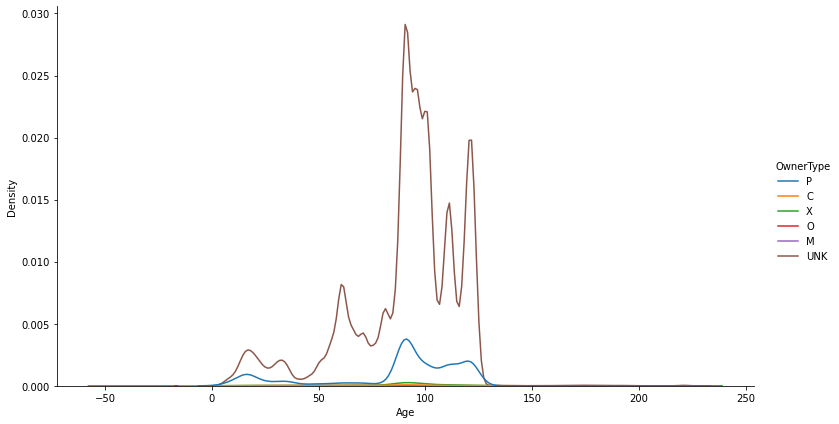

In [15]:
sns.displot(data=data_BK_nonZero, x='Age', hue='OwnerType', kind='kde', height=6, aspect=1.8);

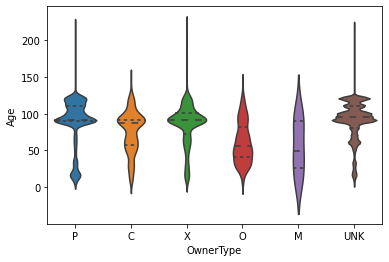

In [16]:
sns.violinplot(x='OwnerType', y='Age', data=data_BK_nonZero, inner="quartile")

In [17]:
data_BK_nonZero.head()

,ZipCode,Address,BldgClass,LandUse,OwnerType,OwnerName,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumFloors,UnitsRes,UnitsTotal,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,CommFAR,XCoord,YCoord,Age
1,11201.0,10 JAY STREET,E9,6,UNK,SAFDI PLAZA REALTY IN,19682,154400,154400,0,17160,0,0,68620,0,68620,9.0,0,90,1920,1994,2007,7.84,2.0,987838.0,195989.0,101
17,11201.0,1 PLYMOUTH STREET,G1,10,C,DEPT OF ENVIRONMENTAL,10650,9585,9585,0,0,0,0,0,0,9585,1.0,0,1,1988,1988,0,0.90,2.0,987216.0,195803.0,33
20,11201.0,65 PLYMOUTH STREET,Q0,9,C,PARKS AND RECREATION,44000,5000,5000,0,0,0,0,0,0,5000,1.0,0,1,1920,0,0,0.11,0.0,986856.0,195975.0,101
22,11201.0,135 PLYMOUTH STREET,D5,3,UNK,DON BEN R CO,41250,211386,37360,174026,0,37360,0,0,0,0,7.0,100,102,1900,2014,0,5.12,2.0,987577.0,195811.0,121
23,11201.0,20 JAY STREET,O6,5,P,DUMBO PARTNERS B LLC,41400,460000,460000,0,368980,3421,41400,46199,0,0,11.0,0,42,1911,1999,0,11.11,2.0,987835.0,195800.0,110


**How many building was altered since it was built?**

In [18]:
# Only use the latest YearAlter
# Note: This code a bit inefficient, should be another way that could process faster
tmp = []
for i in range(0,len(data_BK_nonZero)):
  YearAlter1 = data_BK_nonZero.iloc[i]['YearAlter1']
  YearAlter2 = data_BK_nonZero.iloc[i]['YearAlter2']
  if YearAlter2 == 0:
    tmp.append(YearAlter1)
  else:
    tmp.append(YearAlter2)

In [19]:
data_BK_nonZero['YearAlter'] = tmp

In [20]:
# Only 9.7% is altered since it was built!
sum(data_BK_nonZero['YearAlter'] != 0)/len(data_BK_nonZero['YearAlter'])*100

9.696003922530032

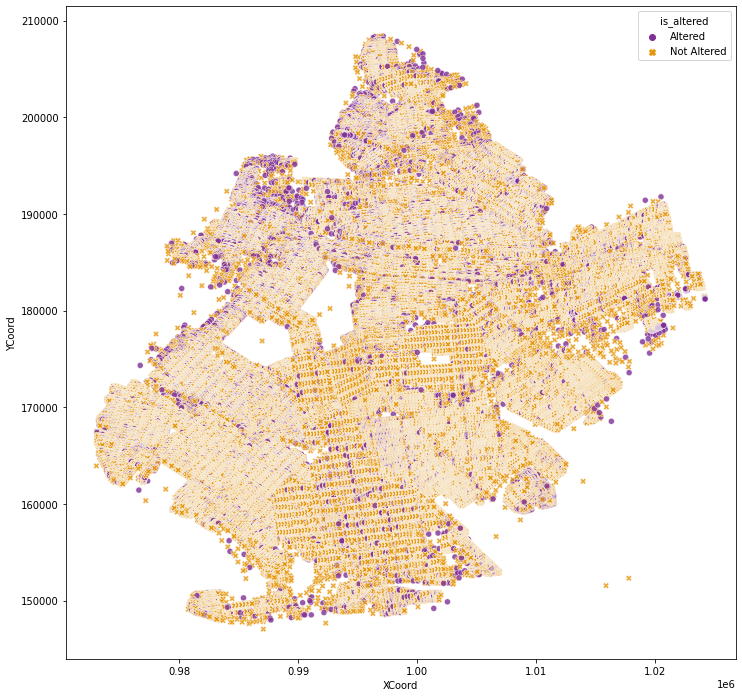

In [21]:
# Distribution of property that already altered
plt.figure(figsize=(12,12))
data_BK_nonZero['is_altered'] = np.where(data_BK_nonZero['YearAlter']== 0, "Not Altered", "Altered")
sns.scatterplot(x='XCoord', y = 'YCoord', data=data_BK_nonZero, hue='is_altered', style='is_altered', palette='CMRmap',alpha=0.8);

In [22]:
data_BK_nonZero['ZipCode'] = data_BK_nonZero['ZipCode'].astype('int').astype('category')
pd.pivot_table(data_BK_nonZero, values=['Age'], 
                     index=['ZipCode'], aggfunc=[np.mean, np.median, np.std]).transpose()

,ZipCode,11201,11203,11204,11205,11206,11207,11208,11209,11210,11211,11212,11213,11214,11215,11216,11217,11218,11219,11220,11221,11222,11223,11224,11225,11226,11228,11229,11230,11231,11232,11233,11234,11235,11236,11237,11238,11239,11241,11249,11416
mean,Age,109.349382,89.494678,89.968760,96.970290,80.745531,81.686358,88.061084,96.582341,95.258099,98.971411,72.130442,102.585446,84.248769,107.723590,105.557448,104.117090,99.521955,87.705787,100.810746,93.304672,97.388169,87.736979,62.896580,100.288548,98.796364,91.481156,87.503823,93.007968,105.144604,94.880216,98.547144,77.256390,82.433400,69.865241,89.612090,97.891419,15.272480,93.0,93.641340,111.0
median,Age,120.000000,91.000000,91.000000,116.000000,90.000000,96.000000,101.000000,96.000000,96.000000,110.000000,91.000000,111.000000,91.000000,116.000000,115.000000,111.000000,100.000000,96.000000,101.000000,111.000000,93.000000,91.000000,61.000000,101.000000,101.000000,96.000000,91.000000,96.000000,120.000000,101.000000,113.000000,81.000000,90.000000,64.000000,90.000000,106.000000,12.000000,93.0,111.000000,111.0
std,Age,35.168437,17.279860,17.353201,31.762431,36.380536,37.401281,34.725625,16.642500,14.488779,28.536054,29.907161,24.612441,22.733902,20.025848,26.043932,25.192708,18.489351,25.625869,18.115359,36.759791,24.050758,19.007639,30.545494,20.075863,21.914245,16.377061,15.523939,19.653867,25.523889,25.690305,36.928480,20.938133,20.093927,18.889009,24.402581,28.933771,8.653745,NaN,34.471593,0.0


**Now we will investigate distribution of LandUse and OwnerType with other variables**

In [23]:
pd.pivot_table(data_BK, values=['LotArea','BldgArea','ComArea','ResArea','OfficeArea','RetailArea','GarageArea','StrgeArea','FactryArea', 'OtherArea'], 
                     index=['LandUse'], aggfunc=[np.mean, np.median])

mean                              ...  median                     
             BldgArea       ComArea    FactryArea  ... ResArea RetailArea StrgeArea
LandUse                                            ...                             
1         2052.589878      0.315359      0.012055  ...    1875          0         0
2         4678.600831     18.646753      1.074604  ...    3200          0         0
3        87685.404051   1257.644010     31.232063  ...   56344          0         0
4         6765.954681   2013.494397      9.430415  ...    2200       1128         0
5        12472.563497  11738.772496    103.945501  ...       0       2015         0
6        17331.457408  17236.838689  10596.045935  ...       0          0         0
7        21188.781314  21117.378850    304.294661  ...       0          0         0
8        36009.908517  34987.507955     84.901965  ...       0          0         0
9         7157.292287   6854.572395      0.000000  ...       0          0         0
10        2704.966008   2636.870032    110.278680  ...       0          0         0
11           1.580658      0.000000      0.000000  ...       0          0         0

[11 rows x 20 columns]

In [24]:
pd.pivot_table(data_BK, values=['LotArea','BldgArea','ComArea','ResArea','OfficeArea','RetailArea','GarageArea','StrgeArea','FactryArea', 'OtherArea'], 
                     index=['OwnerType'], aggfunc=[np.mean, np.median])

mean                 ...     median          
                BldgArea        ComArea  ... RetailArea StrgeArea
OwnerType                                ...                     
P            9081.510192    3304.812437  ...          0         0
C           30947.015327   30475.293084  ...          0         0
X           26379.966573   22836.907773  ...          0         0
O          124631.023508   24715.068716  ...          0         0
M          139953.200000  101705.000000  ...          0         0
UNK          3637.544538     517.329453  ...          0         0

[6 rows x 20 columns]

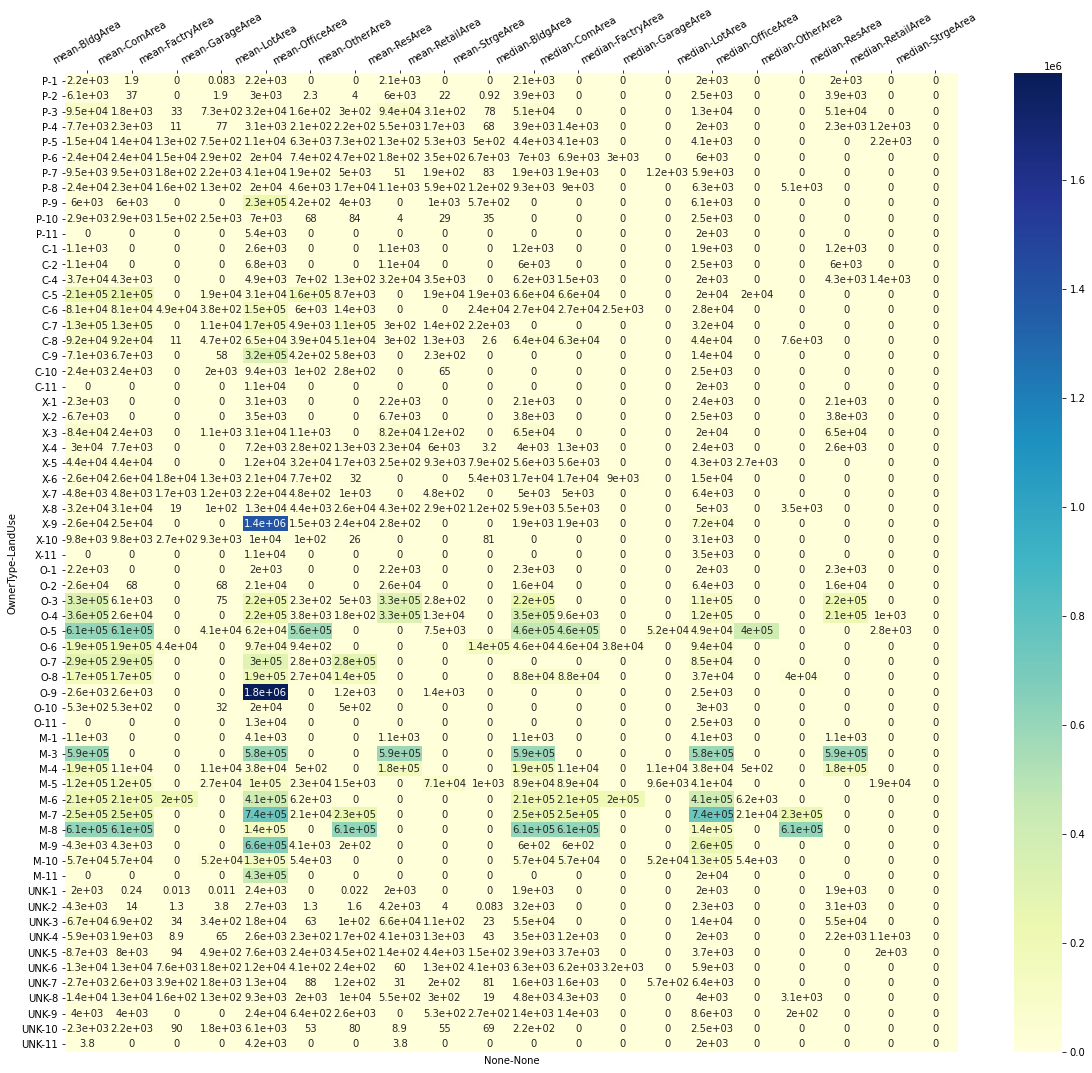

In [25]:
tab = pd.pivot_table(data_BK, values=['LotArea','BldgArea','ComArea','ResArea','OfficeArea','RetailArea','GarageArea','StrgeArea','FactryArea', 'OtherArea'], 
                     index=['OwnerType','LandUse'], aggfunc=[np.mean, np.median])
plt.figure(figsize=(20,18))
ax = sns.heatmap(tab, annot=True, cmap="YlGnBu");
ax.xaxis.tick_top()
plt.xticks(rotation=30);

**Save Cleaned Version**

  - Renamed NAN in OwnerType as UNK
  - Drop NULL values for the rest of variables (only ~1%)

In [26]:
data_BK.to_csv("data_BK_cleaned.csv", index=False)